
# Titanic Survival Prediction

### 학번(이름) :

패턴인식 2주차 실습
- 본 실습은 Kaggle의 "Titanic - Machine Learning from Disaster"에서 제공하는 데이터셋을 활용합니다.
- 실습 목표 : 주어진 csv 파일을 활용하여 전통적 머신러닝 기법을 적용하여 Survival 여부를 판단

> Kaggle의 [Titanic - Macnine Leraning from Disaster](https://www.kaggle.com/competitions/titanic/data) 사이트에서 데이터 셋을 다운로드합니다.
> 데이터 셋은 gender_submission.csv, test.csv, train.csv로 구성되어 있습니다.


# 🚢 Titanic - Machine Learning from Disaster 데이터셋 개요
- 주제: 타이타닉호 침몰 당시 어떤 승객이 생존했는지를 예측하는 문제
- 목표: 주어진 승객의 특성(나이, 성별, 객실 등)을 바탕으로 **생존 여부(Survived)**를 분류
- 타깃 변수: Survived (0 = 사망, 1 = 생존)


## 🎯 학습 목표
- 판다스(Pandas)를 활용하여 데이터 로드
- 탐색적 데이터 분석(EDA, Exploratory Data Analysis)
- Feature Engineering
- 머신러닝 모델 탐색 및 학습
- 생각해보기!
  + 특징(Feature)가 많을수록 성능이 좋아지는가?
  + 모든 특징들이 작업(분류) 수행에 유의미한가? 도움이되는가?



## 📦 필요 패키지
- `pandas`, `numpy`, `scikit-learn`, `matplotlib`
- `tensorflow` (딥러닝)


In [2]:
import warnings

from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings("ignore", category=FutureWarning)


## 1) 판다스(Pandas)를 활용하여 데이터 로드
- Kaggle의 [Titanic - Macnine Leraning from Disaster](https://www.kaggle.com/competitions/titanic/data) 사이트에서 데이터 셋을 다운로드
- titanic 폴더에 압축 해제
- 판다스를 활용하여 train, test 데이터 셋 로드

| 변수명           | 의미                                                     | 타입  | 예시                 |
| ------------- | ------------------------------------------------------ | --- | ------------------ |
| `PassengerId` | 승객 고유 번호                                               | 정수형 | 892                |
| `Survived`    | 생존 여부 (0 = 사망, 1 = 생존)                                 | 범주형 | 0                  |
| `Pclass`      | 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)                      | 범주형 | 3                  |
| `Name`        | 이름                                                     | 문자열 | "Kelly, Mr. James" |
| `Sex`         | 성별                                                     | 범주형 | male / female      |
| `Age`         | 나이                                                     | 실수형 | 22                 |
| `SibSp`       | 함께 탑승한 형제자매/배우자 수                                      | 정수형 | 1                  |
| `Parch`       | 함께 탑승한 부모/자녀 수                                         | 정수형 | 0                  |
| `Ticket`      | 티켓 번호                                                  | 문자열 | "STON/O2. 3101282" |
| `Fare`        | 요금                                                     | 실수형 | 7.25               |
| `Cabin`       | 객실 번호                                                  | 문자열 | C85                |
| `Embarked`    | 승선 항구 (C = Cherbourg, Q = Queenstown, S = Southampton) | 범주형 | S                  |



In [3]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load datasets
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")
submission = pd.read_csv("titanic/gender_submission.csv")

print("Training data shape:", train.shape)
print("Test data shape:", test.shape)
train.head()


Training data shape: (891, 12)
Test data shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# matplotlib 폰트 깨짐 현상 해결
import matplotlib.font_manager as fm
fm.fontManager.ttflist
[f.name for f in fm.fontManager.ttflist]

import matplotlib as mpl
mpl.rcParams['font.family'] = 'NanumGothic'

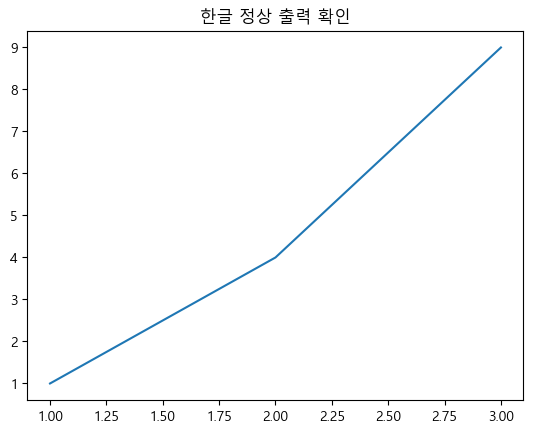

In [10]:
# matplotlib 폰트 깨짐 현상 해결 안되어서 추가

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 윈도우 기본 한글 폰트 (맑은 고딕) 사용
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = fontprop.get_name()

plt.plot([1,2,3], [1,4,9])
plt.title("한글 정상 출력 확인")
plt.show()


## 2) 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
- 모델 개발 전 데이터 분석
- 문자열 데이터 (Name, Ticket, Cabin) 제외 -> 분석에 큰 영향 없음

#### 데이터 구조 확인

In [11]:
print(train.shape)
print(train.columns)
print(test.shape)
print(test.columns) # target 인 Survived 없음

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Survived (Target Variable) 분포 확인

<Axes: ylabel='count'>

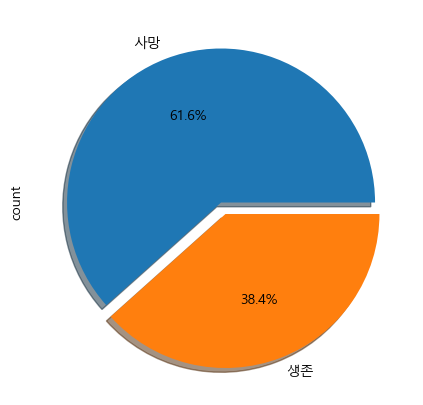

In [12]:
# 생존비율 확인
train["Survived"].value_counts()

plt.figure(figsize=(8, 5))
labels = ['사망', '생존']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08],
                                          shadow=True,
                                          autopct='%1.1f%%',
                                          labels=labels)

- 사망 비율은 61.6%, 생존 비율은 38.4%로 사망한 탑승객의 수가 더 많음

#### 성별 (Sex)

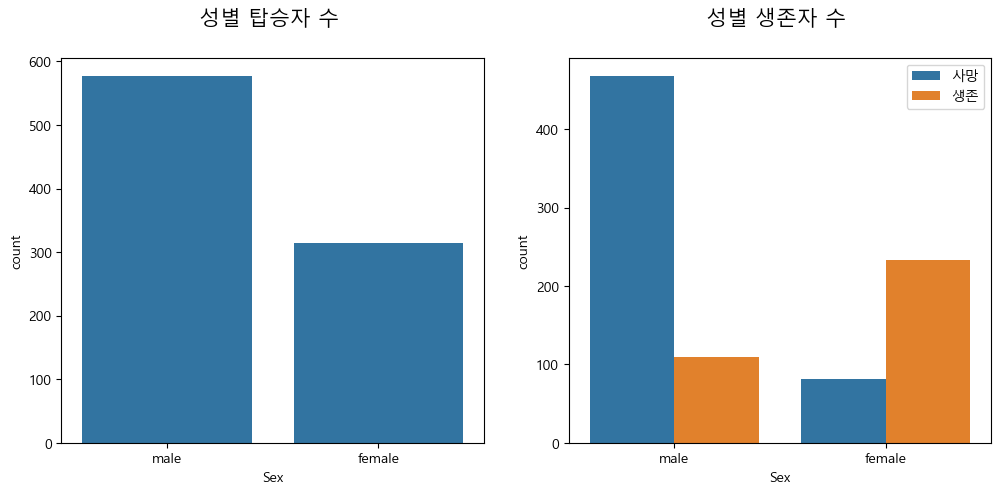

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Sex", data=train, ax=axes[0])

axes[1].set_title("성별 생존자 수 \n", size=15)
sns.countplot(x="Sex", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

- 남성의 탑승자 수가 더 많지만 여성의 생존자 수가 더 많음

,Survived
Sex,
female,0.742038
male,0.188908


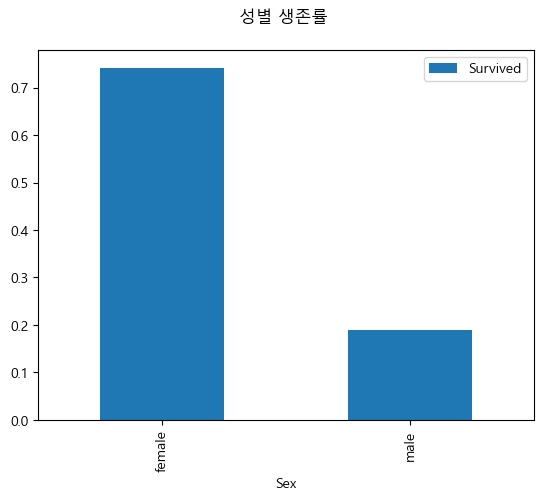

In [14]:
# 성별 생존률
sur = train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar()
sur.set_title("성별 생존률 \n")
train[['Sex', 'Survived']].groupby('Sex').mean()

- 여성의 생존률이 74.2%로 남성의 18.9%보다 훨씬 높음
- 여성과 어린이가 먼저 구명정에 탑승한 '여성 및 어린이 우선' 정책의 영향으로 추정
- 성별이 생존에 중요한 영향을 미치는 변수임을 알 수 있음

#### 티켓 등급 (Pclass)

In [351]:
train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


- 1등석의 생존률이 62.9%로 3등석의 24.2%보다 훨씬 높음
- 부유층이 우선적으로 구명정에 탑승했을 가능성
- 객실 등급이 생존에 중요한 영향을 미치는 변수임을 알 수 있음

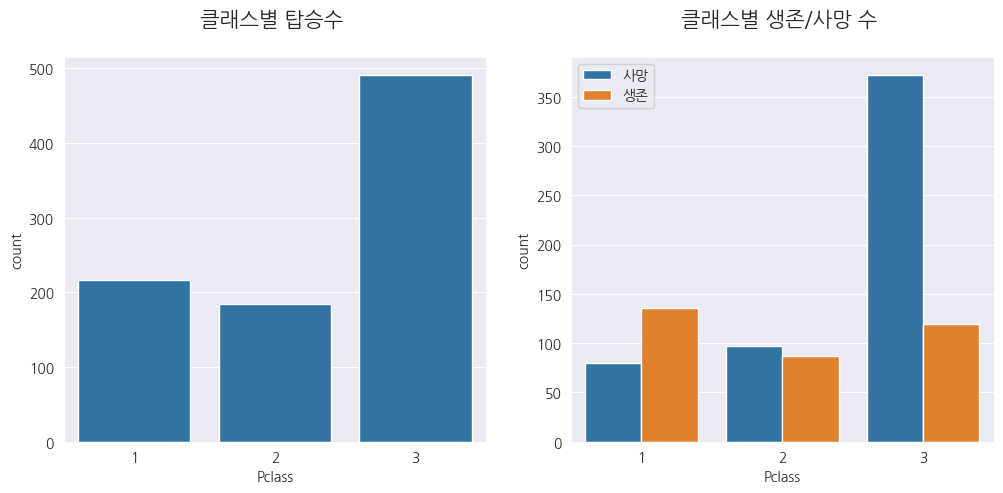

In [352]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("클래스별 탑승수 \n", size=15)
sns.countplot(data=train, x='Pclass', ax=axes[0])

axes[1].set_title("클래스별 생존/사망 수 \n", size=15)
sns.countplot(x="Pclass", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

- 1등석의 탑승자 수가 가장 적지만 생존자 수는 가장 많음

#### 나이 (Age)

In [15]:
print(train['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

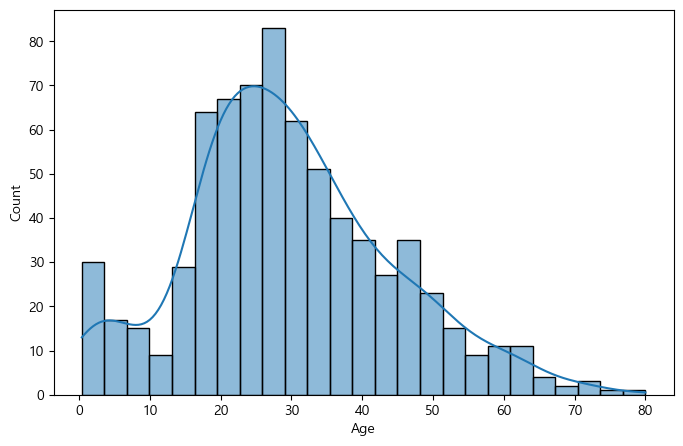

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Age'], bins=25, kde=True)

- 탑승객의 나이는 0.42세부터 80세까지 다양
- 평균 나이는 약 29.7세, 중앙값은 약 28세로 비교적 젊은 층이 많음

<Axes: xlabel='Age', ylabel='Count'>

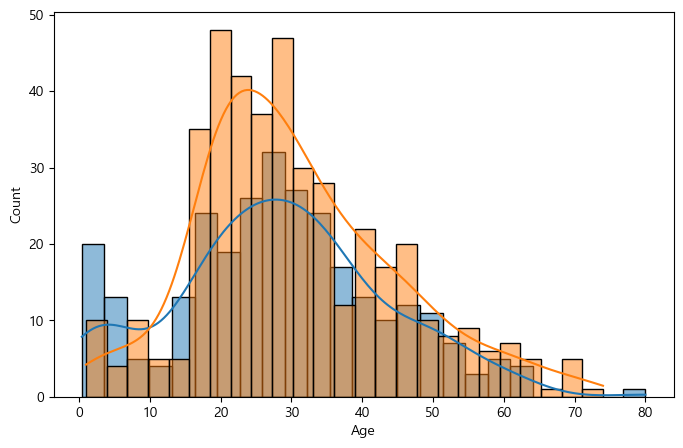

In [17]:
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.histplot(sur['Age'], bins=25, kde=True)
sns.histplot(dead['Age'], bins=25, kde=True)

- 생존자와 사망자의 나이 분포는 비슷
- 다만 생존자 중 0~10세 어린이의 비율이 상대적으로 높음
- 어린이가 생존에 유리한 변수임을 알 수 있음

#### 함께 탑승한 가족 수 (SibSp, Parch)
- SibSp: 함께 탑승한 형제자매/배우자 수
- Parch: 함께 탑승한 부모/자녀 수

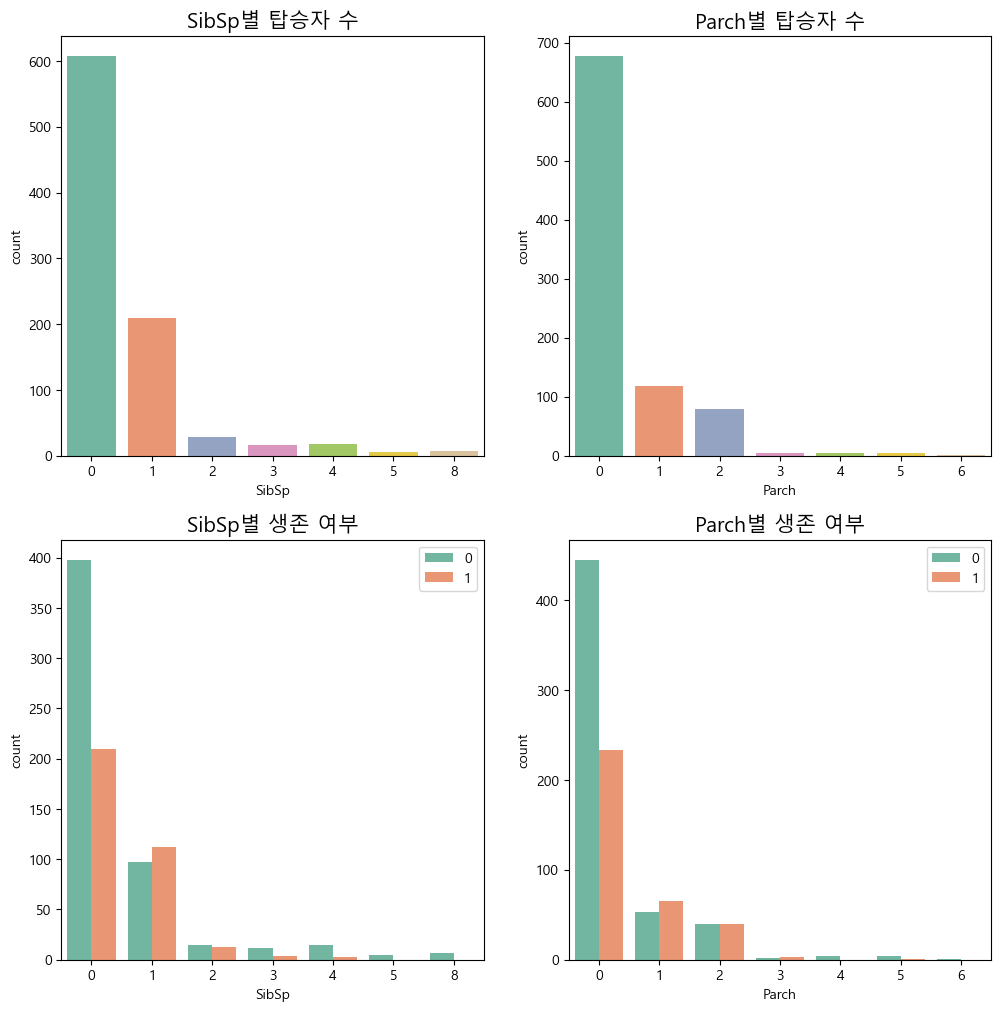

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0][0].set_title("SibSp별 탑승자 수", size=15)
sns.countplot(x="SibSp", data=train, ax=axes[0][0], palette="Set2")
axes[0][1].set_title("Parch별 탑승자 수", size=15)
sns.countplot(x="Parch", data=train, ax=axes[0][1], palette="Set2")

axes[1][0].set_title("SibSp별 생존 여부", size=15)
sns.countplot(x="SibSp", hue="Survived", data=train, ax=axes[1][0], palette="Set2")
axes[1][0].legend(loc='upper right')
axes[1][1].set_title("Parch별 생존 여부", size=15)
sns.countplot(x="Parch", hue="Survived", data=train, ax=axes[1][1], palette="Set2")
axes[1][1].legend(loc='upper right')

<Axes: xlabel='Parch'>

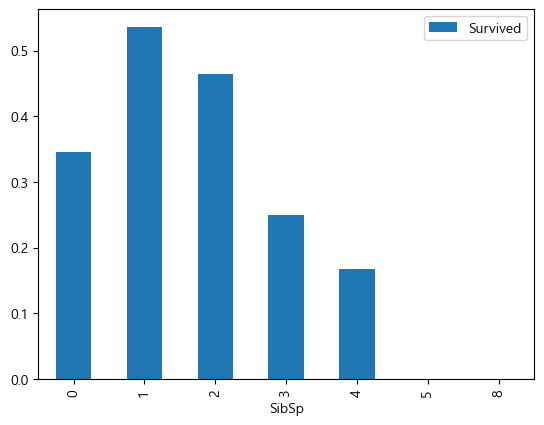

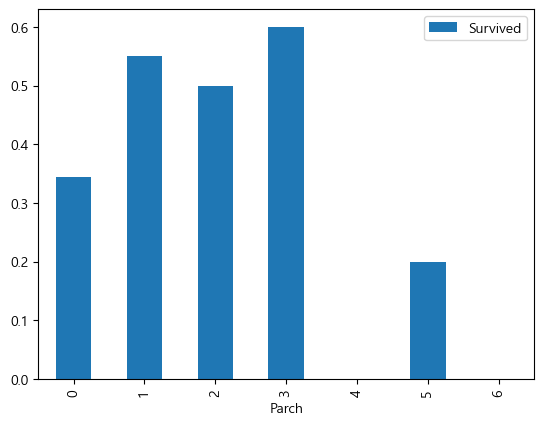

In [19]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().plot.bar()
train[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar()

- 함께 탑승한 가족 수가 1~3명인 경우 생존률이 높음
- 혼자 탑승한 경우(0명)나 가족이 많은 경우(4명 이상)는 생존률이 낮음
- 적당한 가족 수가 생존에 유리한 변수임을 알 수 있음
- 혼자 탑승한 경우는 긴급 상황에서 도움을 받기 어려웠을 가능성
- 가족이 많은 경우는 구명정 탑승 경쟁에서 불리했을 가능성

#### 탑승 항구 (Embarked)

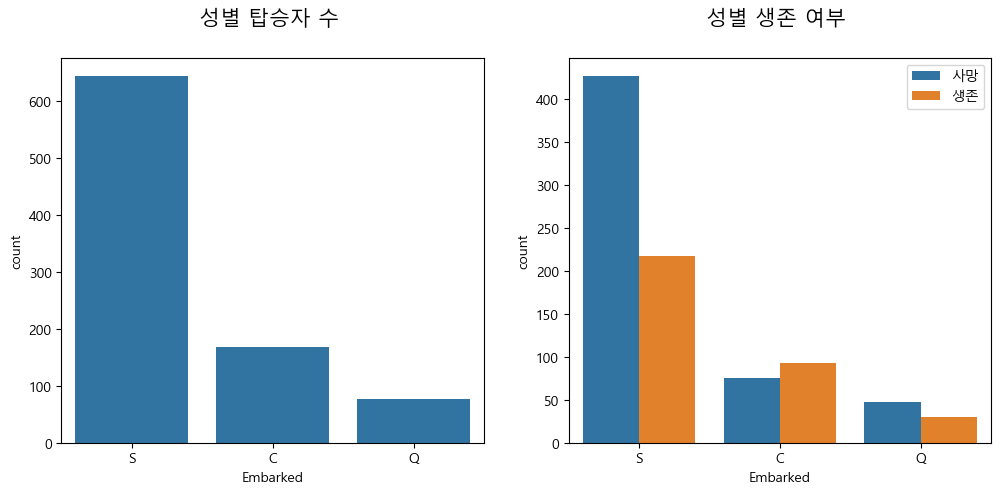

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].set_title("성별 탑승자 수 \n", size=15)
sns.countplot(x="Embarked", data=train, ax=axes[0])

axes[1].set_title("성별 생존 여부 \n", size=15)
sns.countplot(x="Embarked", hue="Survived", data=train, ax=axes[1])
axes[1].legend(labels = ['사망', '생존'])

<Axes: xlabel='Embarked'>

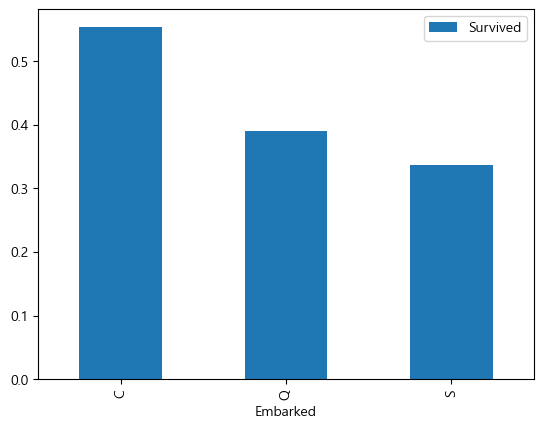

In [21]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()

- S(사우스햄튼) 항구에서 탑승한 승객이 가장 많음
- C(셰르부르) 항구에서 탑승한 승객의 생존률이 55.4%로 가장 높음
- E(퀸스타운) 항구에서 탑승한 승객의 생존률이 38.9%로 중간
- S(사우스햄튼) 항구에서 탑승한 승객의 생존률이 33.7%로 가장 낮음

<Axes: >

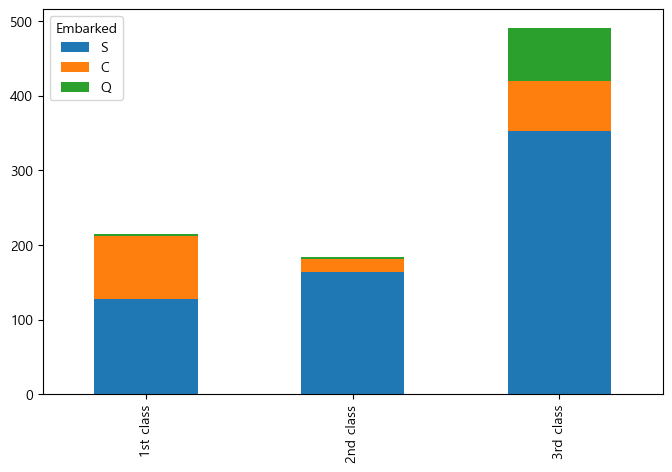

In [22]:
pc1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
pc2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
pc3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
pc = pd.DataFrame([pc1, pc2, pc3])
pc.index = ['1st class', '2nd class', '3rd class']

fig, ax = plt.subplots(figsize=(8, 5))
pc.plot(kind='bar', stacked=True, ax=ax)

- 1등석은 C(셰르부르) 항구에서, 3등석은 S(사우스햄튼) 항구에서 주로 탑승
- 객실 등급과 탑승 항구가 상관관계가 있음을 알 수 있음

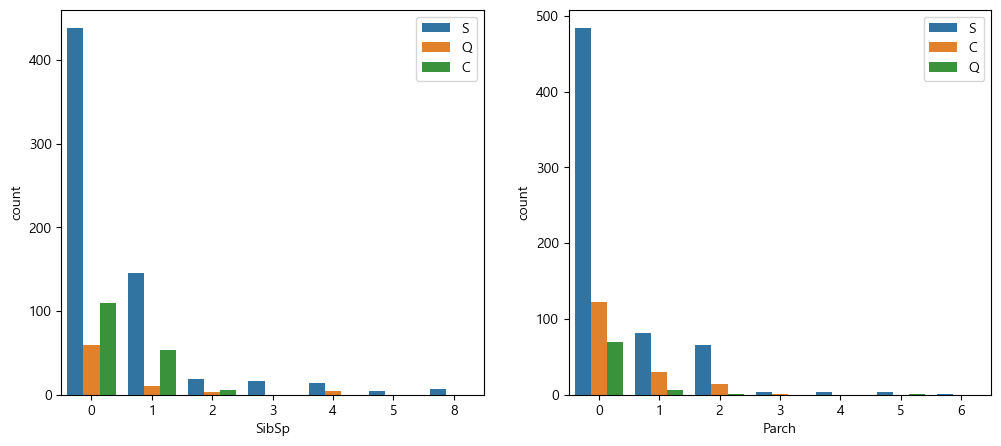

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=train, x='SibSp', hue='Embarked', ax=ax[0])
sns.countplot(data=train, x='Parch', hue='Embarked', ax=ax[1])
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

- 함께 탑승한 가족 수와 탑승 항구가 상관관계가 있음을 알 수 있음
- S(사우스햄튼) 항구에서 탑승한 승객은 혼자 탑승한 경우가 많음
- C(셰르부르) 항구에서 탑승한 승객은 함께 탑승한 가족 수가 많은 경우가 많음

#### 요금 (Fare)

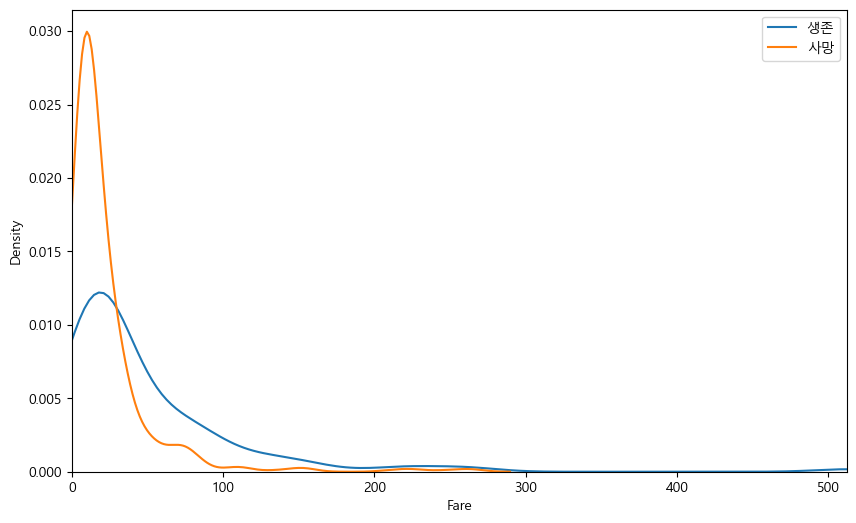

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

# 분포 확인
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)

# 축 범위
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['생존', '사망'])

plt.show()

- 생존자와 사망자의 요금 분포는 비슷
- 다만 생존자 중 요금이 높은 승객의 비율이 상대적으로 높음

r
## 3) Feature Engineering
- 머신러닝 모델에 적합한 형태로 데이터 전처리
- 결측치 처리, 범주형 변수 인코딩, 관계없는 변수제거 등

#### 결측치 처리

<Axes: >

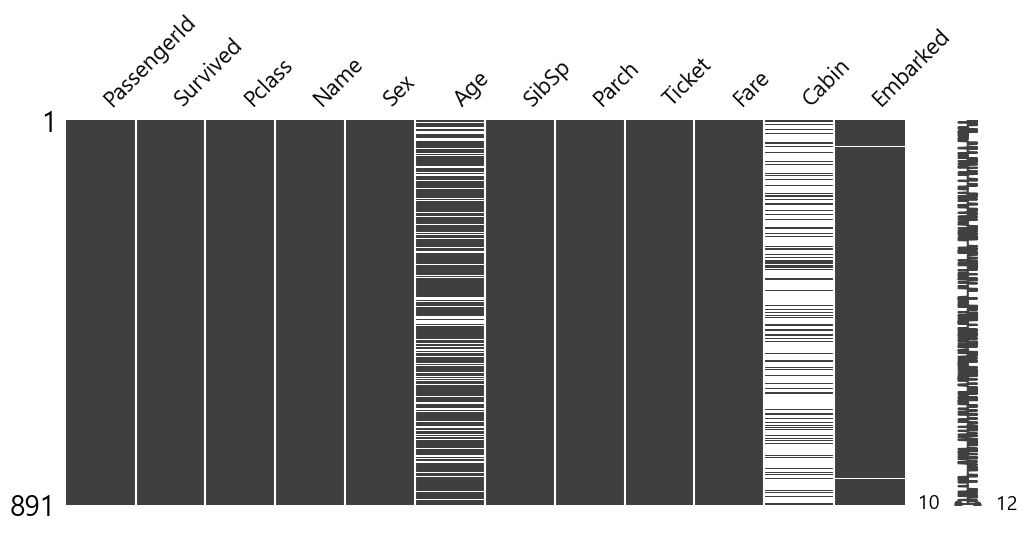

In [25]:
# 결측치 시각화
import missingno as msno
msno.matrix(train, figsize=(12, 5))

##### 나이 (Age) 결측치 처리
- 나이(Age) 변수에 결측치가 177개(약 20%) 존재
- 나이의 중앙값(28세)으로 대체
- 나이는 생존에 중요한 영향을 미치는 변수이므로 결측치를 제거하지 않고 대체
- 나이의 분포가 왜곡되어 있으므로 평균보다는 중앙값으로 대체
- 나이의 결측치가 많으므로 나이 그룹(AgeGroup) 변수를 새로 생성하여 보완
- 나이 그룹은 0\~10, 10\~20, ..., 70\~80, 80 이상으로 구분
- 나이 그룹은 범주형 변수로 인코딩

In [26]:
def fe_age(orig_df):
    df = orig_df.copy()
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0,10,20,30,40,50,60,70,80,90], labels=False)
    df['AgeGroup'] = df['AgeGroup'].astype('category')
    df.drop(columns=['Age'], inplace=True)
    return df

result = fe_age(train)

print(train['Age'])
print(result['AgeGroup'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: AgeGroup, Length: 891, dtype: category
Categories (8, int64): [0, 1, 2, 3, 4, 5, 6, 7]


##### 객실번호 (Cabin) 결측치 처리
- 객실번호(Cabin) 변수에 결측치가 687개(약 77%) 존재
- 객실번호의 첫 글자만 추출하여 새로운 변수로 생성
- 객실번호(Cabin) 변수는 범주형 변수로 인코딩
- 객실번호(Cabin) 변수의 결측치는 'U'로 대체 (Unknown)

In [27]:
def fe_cabin(orig_df):
    df = orig_df.copy()
    df['Cabin'].fillna('U', inplace=True)
    df['Cabin'] = df['Cabin'].str[0]
    df['Cabin'] = df['Cabin'].astype('category').cat.codes
    return df

result = fe_cabin(train)

print(train['Cabin'])
print(result['Cabin'])

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object
0      8
1      2
2      8
3      2
4      8
      ..
886    8
887    1
888    8
889    2
890    8
Name: Cabin, Length: 891, dtype: int8


##### 승선항구 (Embarked) 결측치 처리
- 승선항구(Embarked) 변수에 결측치가 2개 존재
- 승선항구의 최빈값('S')으로 대체
- 승선항구(Embarked) 변수는 범주형 변수로 인코딩

In [28]:
def fe_embarked(orig_df):
    df = orig_df.copy()
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Embarked'] = df['Embarked'].astype('category').cat.codes
    return df

result = fe_embarked(train)

print(train['Embarked'])
print(result['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int8


##### 요금(Fare) 결측치 처리
- 요금(Fare) 변수에 결측치가 1개 존재 (test 데이터셋)
- 요금의 중앙값으로 대체
- 요금(Fare) 변수는 범주형 변수로 인코딩

In [29]:
def fe_fare(orig_df):
    df = orig_df.copy()
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Fare'] = pd.qcut(df['Fare'], 4, labels=False)  # 사분위수로 구간 나누기
    df['Fare'] = df['Fare'].astype('category')
    return df

result = fe_fare(train)

print(train['Fare'])
print(result['Fare'])

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64
0      0
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    0
Name: Fare, Length: 891, dtype: category
Categories (4, int64): [0, 1, 2, 3]


#### 범주형 변수 인코딩

##### 성별 (Sex) 변수 인코딩
- 성별은 문자열 데이터이므로 0과 1로 인코딩

In [30]:
def fe_sex(orig_df):
    df = orig_df.copy()
    df['Sex'] = df['Sex'].astype('category').cat.codes
    return df

result = fe_sex(train)

print(train['Sex'])
print(result['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int8


##### 이름 (Name) 변수 인코딩
- 이름에서 호칭(Title)만 추출하여 새로운 변수로 생성
- 호칭(Title) 변수는 범주형 변수로 인코딩

In [31]:
def fe_name(orig_df):
    df = orig_df.copy()
    df['Name'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Name'] = df['Name'].replace(['Dr', 'Rev', 'Mlle', 'Major', 'Col', 'Countess',
                                        'Capt', 'Ms', 'Sir', 'Lady', 'Mme', 'Don', 'Jonkheer'], 'Other')

    df['Name'] = df['Name'].astype('category').cat.codes
    return df

result = fe_name(train)

print(train['Name'])
print(result['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object
0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Name, Length: 891, dtype: int8


##### 가족 규모 (FamilySize) 변수 생성
- 가족 규모(FamilySize) = 함께 탑승한 형제자매/배우자 수(SibSp) + 함께 탑승한 부모/자녀 수(Parch) + 1(본인)
- 가족 규모(FamilySize) 변수는 정수형 변수로 사용

In [32]:
def fe_family_size(orig_df):
    df = orig_df.copy()
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df.drop(columns=['SibSp', 'Parch'], inplace=True)
    return df

result = fe_family_size(train)

print(train[['SibSp', 'Parch']])
print(result['FamilySize'])

     SibSp  Parch
0        1      0
1        1      0
2        0      0
3        1      0
4        0      0
..     ...    ...
886      0      0
887      0      0
888      1      2
889      0      0
890      0      0

[891 rows x 2 columns]
0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64


#### 불필요한 변수 제거
- PassengerId: 단순 식별자, 모델에 영향 없음
- Ticket: 티켓 번호, 모델에 영향 없음
- 원본 데이터프레임에서 제거

In [33]:
def fe_drop_columns(orig_df, cols_to_drop=['PassengerId', 'Ticket']):
    df = orig_df.copy()
    df.drop(columns=cols_to_drop, inplace=True)
    return df

result = fe_drop_columns(train)

print(train.columns)
print(result.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


#### 최종 Feature Engineering 함수
- 위에서 정의한 모든 전처리 함수를 하나로 합침

In [34]:
def feature_engineering(df):
    df = fe_age(df)
    df = fe_cabin(df)
    df = fe_embarked(df)
    df = fe_fare(df)
    df = fe_sex(df)
    df = fe_name(df)
    df = fe_family_size(df)
    df = fe_drop_columns(df)
    return df

result = feature_engineering(train)
print(result.head())

   Survived  Pclass  Name  Sex Fare  Cabin  Embarked AgeGroup  FamilySize
0         0       3     2    1    0      8         2        2           2
1         1       1     3    0    3      2         0        3           2
2         1       3     1    0    1      8         2        2           1
3         1       1     3    0    3      2         2        3           2
4         0       3     2    1    1      8         2        3           1


### Feature 간 상관관계 확인
- 상관계수 행렬과 클러스터 맵 시각화
- 상관관계가 높은 변수는 중복된 정보를 가질 수 있으므로 주의
- 상관관계가 낮은 변수는 모델에 도움이 될 수 있으므로 포함

In [35]:
result.corr()

,Survived,Pclass,Name,Sex,Fare,Cabin,Embarked,AgeGroup,FamilySize
Survived,1.000000,-0.338481,-0.052471,-0.543351,0.299357,-0.301116,-0.167675,-0.051406,0.016639
Pclass,-0.338481,1.000000,-0.195910,0.131900,-0.634271,0.746616,0.162098,-0.340522,0.065997
Name,-0.052471,-0.195910,1.000000,0.040484,0.045648,-0.113568,-0.011509,0.445039,-0.207530
Sex,-0.543351,0.131900,0.040484,1.000000,-0.243613,0.123076,0.108262,0.078187,-0.200988
Fare,0.299357,-0.634271,0.045648,-0.243613,1.000000,-0.512984,-0.098593,0.098749,0.465396
Cabin,-0.301116,0.746616,-0.113568,0.123076,-0.512984,1.000000,0.194255,-0.255305,0.012131
Embarked,-0.167675,0.162098,-0.011509,0.108262,-0.098593,0.194255,1.000000,-0.000596,0.066516
AgeGroup,-0.051406,-0.340522,0.445039,0.078187,0.098749,-0.255305,-0.000596,1.000000,-0.229665
FamilySize,0.016639,0.065997,-0.207530,-0.200988,0.465396,0.012131,0.066516,-0.229665,1.000000


C:\Users\euso\anaconda3\envs\ai\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


C:\Users\euso\anaconda3\envs\ai\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
C:\Users\euso\anaconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


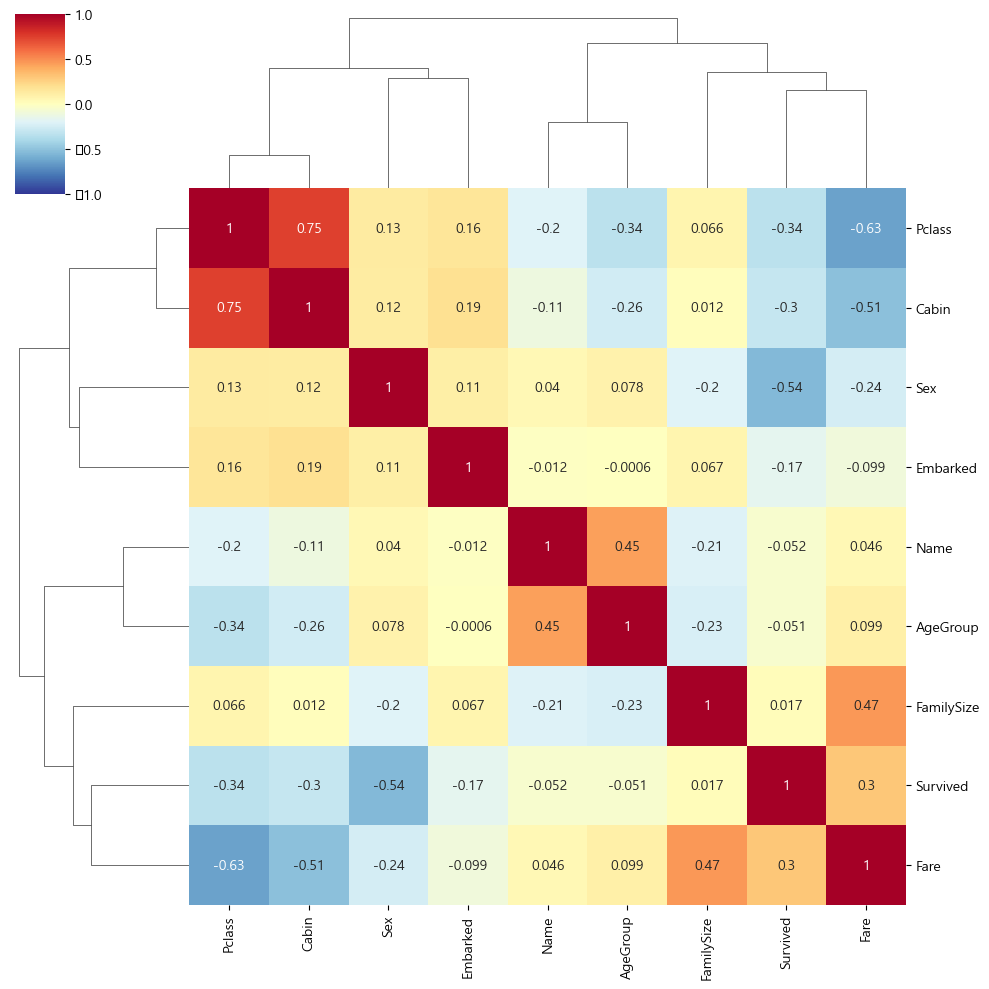

In [36]:
sns.clustermap(result.corr(),
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

- Pclass와 Cabin은 상관관계가 높음

## 4) 머신러닝 모델 탐색 및 학습
- KNN, SVM, Decision Tree 등 다양한 모델 시도

### 데이터 전처리

In [37]:
train_fe = feature_engineering(train)
x_train = train_fe.drop('Survived', axis=1)
y_train = train_fe['Survived']

test_fe = feature_engineering(test)
x_test = test_fe

### 모듈 불러오기

In [38]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### KNN

In [39]:
model = KNeighborsClassifier()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8451175599224671 0.7957692549118072

0.8451175599224671 0.7957692549118072


In [378]:
### Decision Tree

In [40]:
model = DecisionTreeClassifier()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.9200344327654946 0.8114870378507313

0.9200344327654946 0.8137405059318311


### Support Vector Machine (SVM)

In [41]:
model = SVC()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8285634366578943 0.8136902893729208

0.8285634366578943 0.8136902893729208


## 5) 특징 선택 (Feature Selection)
- PClass와 Cabin은 상관관계가 높으므로 하나만 선택

In [42]:
train_fe_new = fe_drop_columns(train_fe, cols_to_drop=['Cabin'])
x_train = train_fe_new.drop('Survived', axis=1)
y_train = train_fe_new['Survived']

test_fe_new = fe_drop_columns(test_fe, cols_to_drop=['Cabin'])
x_test = test_fe_new

print(train_fe.columns)
print(train_fe_new.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Fare', 'Cabin', 'Embarked',
       'AgeGroup', 'FamilySize'],
      dtype='object')
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Fare', 'Embarked', 'AgeGroup',
       'FamilySize'],
      dtype='object')


In [43]:
model = SVC()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))
# 0.8350158374962573 0.8293892411022534

0.8350158374962573 0.8293892411022534


- Feature Importance를 활용한 특징 선택
- RandomForestClassifier 모델을 사용하여 특징 중요도 계산

0.9029185117481129 0.8170861841692298


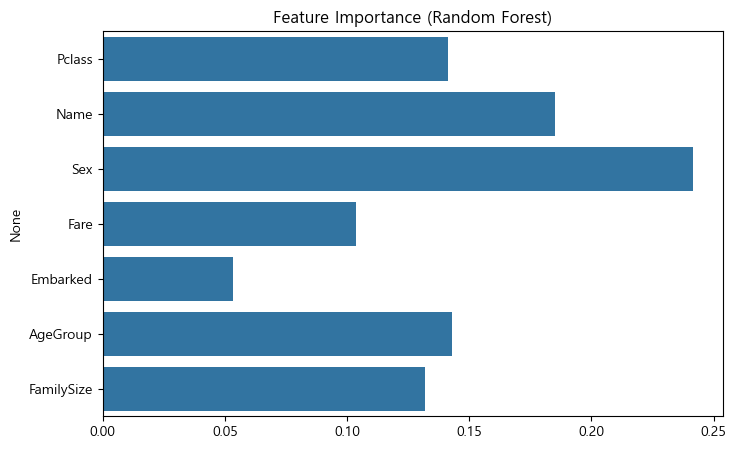

In [44]:
model = RandomForestClassifier()
score = cross_validate(model, x_train, y_train,
                      return_train_score=True, n_jobs=-1,
                      cv = StratifiedKFold())
print(np.mean(score['train_score']), np.mean(score['test_score']))

model.fit(x_train, y_train)
importances = model.feature_importances_
features = x_train.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

## 5) 테스트 데이터셋 예측 및 제출 파일 생성

In [45]:
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)

submission['Survived'] = pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
submission.to_csv("./submission_result.csv", index=False)
# SVC : 0.77033

## 질문에 대한 답변
1) 특징(Feature)가 많을수록 성능이 좋아지는가?


관련성이 높은 특징(예: 성별, 나이, 선실 등급 등)은 성능을 높이는 데 기여하지만, 불필요한 특징이 모델을 혼란스럽게 하고 과적합을 유발할 수 있다.
단순히 많은 특징을 쓰는 것이 아니라, 유의미하고 중요한 특징을 선별하거나 가공(Feature Engineering)하는 것이 더 중요.

2) 모든 특징들이 작업(분류) 수행에 유의미한가? 도움이되는가?

모든 특징이 도움이 되지는 않는다. 예를 들어 타이타닉 데이터에서 성별, 나이, 선실 등급은 생존과 밀접한 관련이 있지만, 단순한 ID나 무작위 성격의 티켓 번호 등은 분류 성능에 기여하지 못한다. 따라서 특징 선택과 가공이 필요하다.